In [1]:
#Loading the dependent utils fucntion and the model
from utils import *
from model import *

In [2]:
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.get_device_name(0))
print(torch.cuda.get_device_properties(0))

2.0.0+cu117
11.7
8500
NVIDIA GeForce RTX 2050
_CudaDeviceProperties(name='NVIDIA GeForce RTX 2050', major=8, minor=6, total_memory=4095MB, multi_processor_count=16)


In [3]:
# CUDA?
cuda = torch.cuda.is_available()
device = torch.device("cuda")
print("CUDA Available?", cuda)

#Preprocess training data
train_transforms = preprocess_data("train")

#Preprocess test data
test_transforms = preprocess_data("test")


#Load MNIST training data with transformations

train_data = datasets.MNIST('../data',train = True,download=True,transform=train_transforms)
test_data = datasets.MNIST('../data',train = False,download=True,transform=test_transforms)


CUDA Available? True


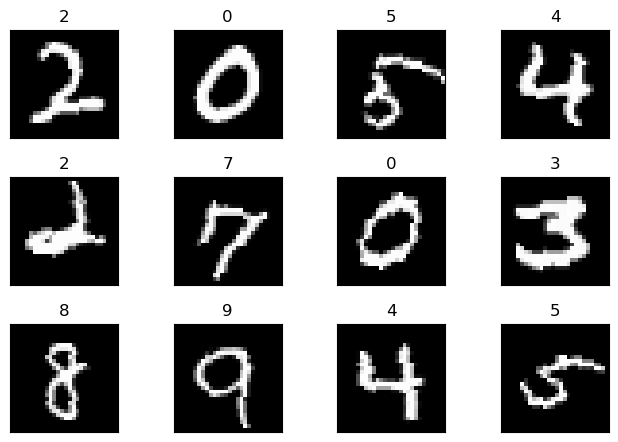

In [4]:
batch_size = 32 

kwargs = {'batch_size': batch_size,'shuffle':True,'num_workers':2,'pin_memory':True}

train_loader = DataLoader(train_data,**kwargs)
test_loader = DataLoader(test_data,**kwargs)

#Print the load trained data 
plot_data(train_loader,12)

In [5]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_loss, train_accuracy = train(model, device, train_loader, optimizer,train_acc)
    test_loss, test_accuracy = test(model, device, test_loader,test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    scheduler.step()


Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0189 Batch_id=1874 Accuracy=94.04: 100%|██████████| 1875/1875 [00:26<00:00, 70.93it/s]


Test set: Average loss: 0.0365, Accuracy: 9879/10000 (98.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1337 Batch_id=1874 Accuracy=98.16: 100%|██████████| 1875/1875 [00:43<00:00, 43.33it/s]


Test set: Average loss: 0.0268, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0060 Batch_id=1874 Accuracy=98.66: 100%|██████████| 1875/1875 [00:34<00:00, 54.49it/s]


Test set: Average loss: 0.0202, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.2555 Batch_id=1874 Accuracy=98.83: 100%|██████████| 1875/1875 [00:32<00:00, 56.94it/s]


Test set: Average loss: 0.0249, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0054 Batch_id=1874 Accuracy=98.94: 100%|██████████| 1875/1875 [00:33<00:00, 56.03it/s]


Test set: Average loss: 0.0245, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0405 Batch_id=1874 Accuracy=99.04: 100%|██████████| 1875/1875 [00:35<00:00, 52.40it/s]


Test set: Average loss: 0.0203, Accuracy: 9942/10000 (99.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0104 Batch_id=1874 Accuracy=99.16: 100%|██████████| 1875/1875 [00:33<00:00, 55.20it/s]


Test set: Average loss: 0.0169, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0019 Batch_id=1874 Accuracy=99.21: 100%|██████████| 1875/1875 [00:33<00:00, 56.24it/s]


Test set: Average loss: 0.0190, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0012 Batch_id=1874 Accuracy=99.28: 100%|██████████| 1875/1875 [00:33<00:00, 56.13it/s]


Test set: Average loss: 0.0182, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0012 Batch_id=1874 Accuracy=99.26: 100%|██████████| 1875/1875 [00:33<00:00, 55.28it/s]


Test set: Average loss: 0.0222, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0494 Batch_id=1874 Accuracy=99.30: 100%|██████████| 1875/1875 [00:31<00:00, 59.05it/s]


Test set: Average loss: 0.0181, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0005 Batch_id=1874 Accuracy=99.35: 100%|██████████| 1875/1875 [00:34<00:00, 54.90it/s]


Test set: Average loss: 0.0176, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.1113 Batch_id=1874 Accuracy=99.44: 100%|██████████| 1875/1875 [00:33<00:00, 55.27it/s]


Test set: Average loss: 0.0193, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0124 Batch_id=1874 Accuracy=99.45: 100%|██████████| 1875/1875 [00:33<00:00, 56.50it/s]


Test set: Average loss: 0.0185, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0041 Batch_id=1874 Accuracy=99.50: 100%|██████████| 1875/1875 [00:52<00:00, 35.86it/s]


Test set: Average loss: 0.0243, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0000 Batch_id=1874 Accuracy=99.69: 100%|██████████| 1875/1875 [00:52<00:00, 35.42it/s]


Test set: Average loss: 0.0167, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0066 Batch_id=1874 Accuracy=99.76: 100%|██████████| 1875/1875 [00:57<00:00, 32.59it/s]


Test set: Average loss: 0.0161, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0008 Batch_id=1874 Accuracy=99.78: 100%|██████████| 1875/1875 [00:55<00:00, 34.08it/s]


Test set: Average loss: 0.0157, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0468 Batch_id=1874 Accuracy=99.75: 100%|██████████| 1875/1875 [00:51<00:00, 36.15it/s]


Test set: Average loss: 0.0147, Accuracy: 9952/10000 (99.52%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0005 Batch_id=1874 Accuracy=99.80: 100%|██████████| 1875/1875 [00:53<00:00, 35.28it/s]


Test set: Average loss: 0.0152, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

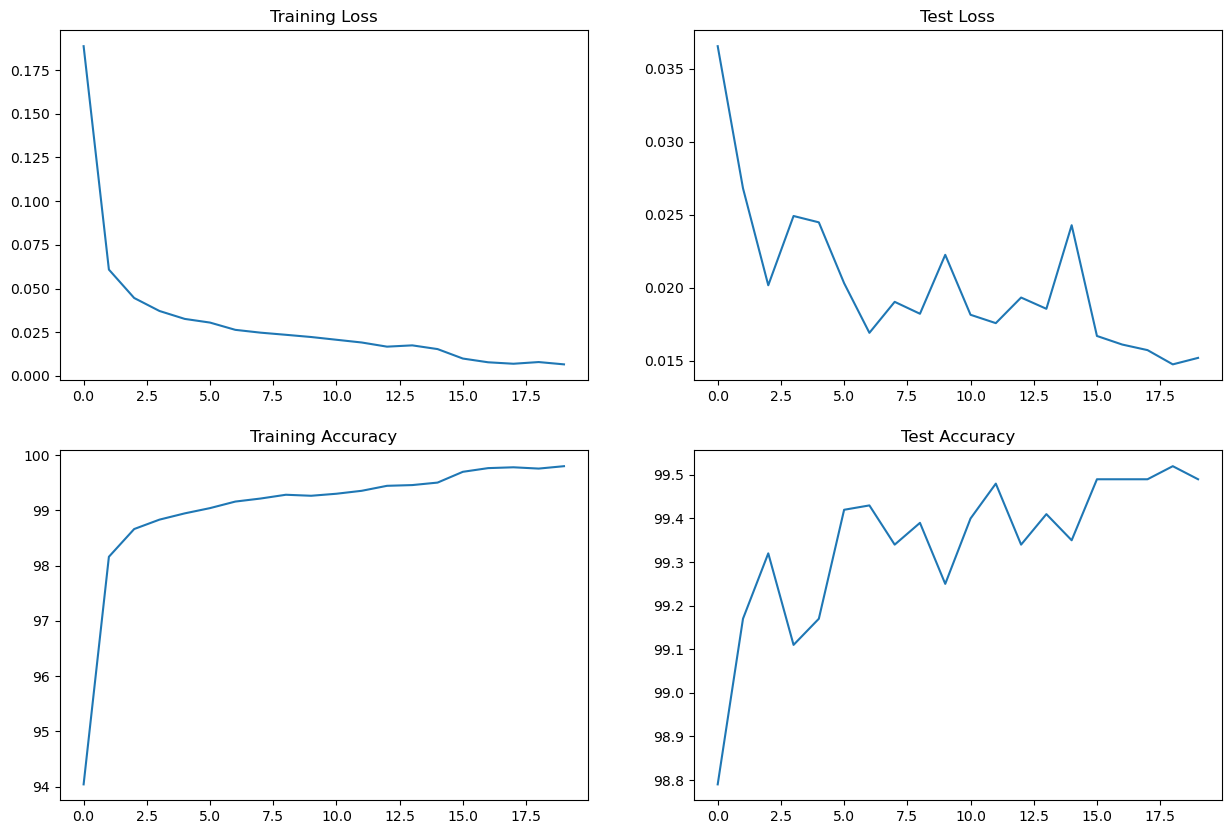

In [6]:
#Plotting the Training and Testing Accuracy and Loss Plots
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
